In [4]:
# Melanie Schwartz
# sno122

## Lab 6A

<em>Lab 6 consists of two exercises on natural language processing through conducting a sentiment analysis on text data.</em>

This exercise is to examine customer review data on airlines around the world and compare the reviews across major world airlines across Business Class, and Economy Class. We will not include First Class and Premium Economy as part of this analysis. We will compare the findings between the text-based reviews and the score-based reviews.

We will be using Skytrax (http://airlineequity.com) data scraped and wrangled by @Efehan on Kaggle (https://www.kaggle.com/efehandanisman/skytrax-airline-reviews). The CSV file has been provided for you. 

**Tasks**

1. Read ```capstone_airline_reviews3.csv``` into a Pandas dataframe. Note that this CSV file has blank lines that you will need to remove within the code. 

2. Analyze the data such that you can find the average polarity of all reviews for each airline's business class and economy class products. From the CSV file you, you will use the ```airline```, ```customer_review```, and ```cabin``` for this analysis. You are conducting a sentiment analysis (polarity only) on the ```customer_review``` data. Only include airlines that have more than 100 reviews for Business Class and more than 200 reviews for Economy Class and more than 500 reviews total. <em>There will only be 28 airlines that meet this requirement.</em> You should create a new ```DataFrame``` that holds the airline name, the average polarity for their business class reviews, and average polarity for their economy class reviews.
3. Plot a scatter plot to compare the ratings with x-axis for the average polarity values for Economy Class and the y-axis for the average polarity values for Business Class. Each dot on the scatter plot represents an airline. The size of the scatter plot should be related to the number of reviews the airline has. 
4. Select one airline and create a word cloud for each of its' business class, economy class, and all its reviews. The phrase ```âœ… Trip Verified |``` appears in front of every review, remove it. Then, conduct a visual analysis of what the most common words were in customers' reviews.
5. Answer the questions below. 

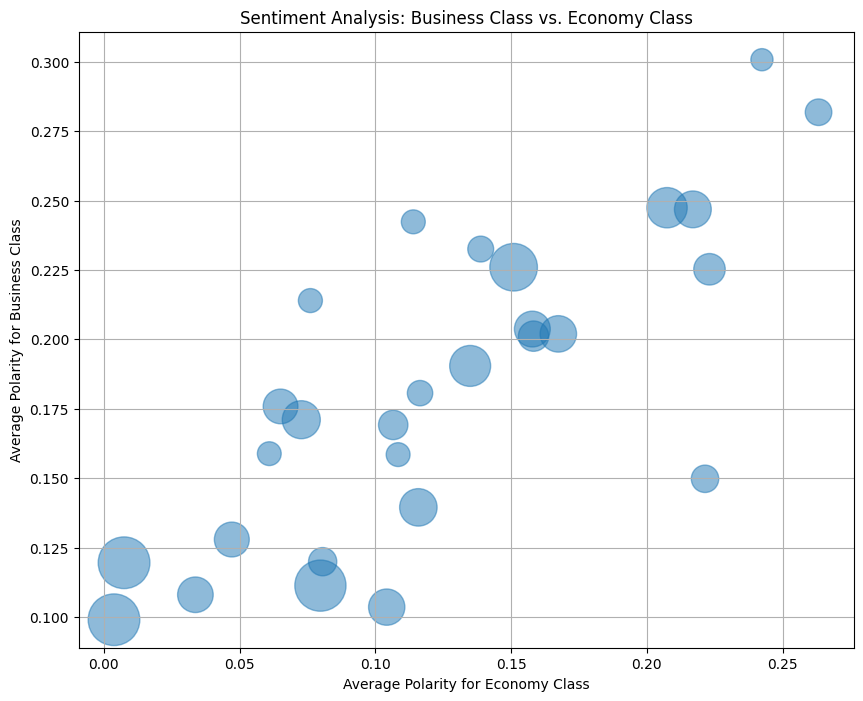

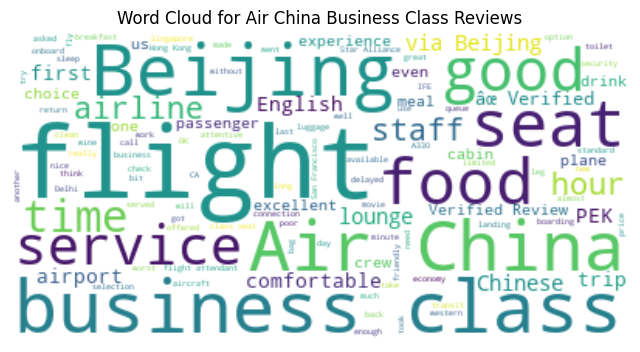

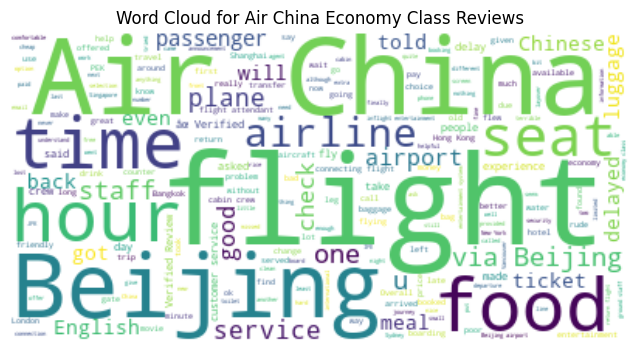

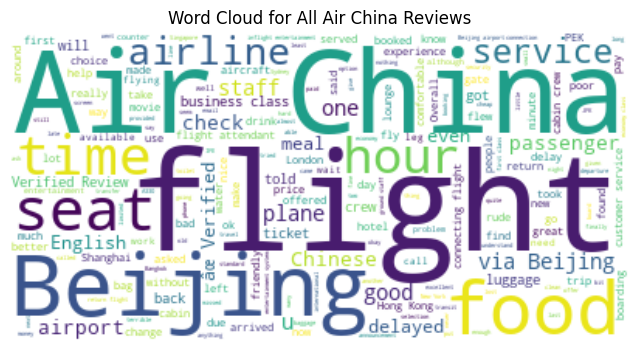

In [5]:
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image

# TODO: 1. Read ```capstone_airline_reviews3.csv``` into a Pandas dataframe. Note that this CSV file has blank lines that you will need to remove within the code. 
df = pd.read_csv( 'capstone_airline_reviews3.csv' )

# Remove blank lines
df.dropna(subset=["airline", "customer_review", "cabin"], inplace=True)

# TODO: 2. Analyze the data such that you can find the average polarity of all reviews for each airline's business class and economy class products. From the CSV file you, you will use the 'airline', 'customer_review', and 'cabin' for this analysis. You are conducting a sentiment analysis (polarity only) on the 'customer_review' data. Only include airlines that have more than 100 reviews for Business Class and more than 200 reviews for Economy Class and more than 500 reviews total. There will only be 28 airlines that meet this requirement. You should create a new 'DataFrame' that holds the airline name, the average polarity for their business class reviews, and average polarity for their economy class reviews.
# Group by airline and cabin, then count reviews
review_counts = df.groupby(['airline', 'cabin']).size().unstack().fillna(0)

# Filter airlines with more than 100 business class reviews and more than 200 economy class reviews
filter_airlines = review_counts[(review_counts['Business Class'] > 100) & (review_counts['Economy Class'] > 200)]

# Filter airlines with more than 500 total reviews
filter_airlines = filter_airlines[filter_airlines.sum(axis=1) > 500]

# Get the list of airline names
select_airlines = filter_airlines.index.tolist()
# Accumulate data in a list of dictionaries
data = []
for airline in select_airlines:
    business_class_polarity = df[(df['airline'] == airline) & (df['cabin'] == 'Business Class')]['customer_review'].apply(lambda x: TextBlob(x).sentiment.polarity).mean()
    economy_class_polarity = df[(df['airline'] == airline) & (df['cabin'] == 'Economy Class')]['customer_review'].apply(lambda x: TextBlob(x).sentiment.polarity).mean()
    
    data.append({
        'Airline': airline, 
        'Avg Business Class Polarity': business_class_polarity, 
        'Avg Economy Class Polarity': economy_class_polarity
    })
   
# DF from list
average_polarity_df = pd.DataFrame(data)

# commented out, used this for question 2 analysis
# print(average_polarity_df)

# TODO: 3. Plot a scatter plot to compare the ratings with x-axis for the average polarity values for Economy Class and the y-axis for the average polarity values for Business Class. Each dot on the scatter plot represents an airline. The size of the scatter plot should be related to the number of reviews the airline has. 
# Plot a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(average_polarity_df['Avg Economy Class Polarity'], average_polarity_df['Avg Business Class Polarity'], s=filter_airlines.sum(axis=1) / 2, alpha=0.5)
plt.xlabel('Average Polarity for Economy Class')
plt.ylabel('Average Polarity for Business Class')
plt.title('Sentiment Analysis: Business Class vs. Economy Class')
plt.grid(True)
plt.show()

# TODO: 4. Select one airline and create a word cloud for each of its' business class, economy class, and all its reviews. The phrase ```âœ… Trip Verified |``` appears in front of every review, remove it. Then, conduct a visual analysis of what the most common words were in customers' reviews.
# Enter your code to process the customer_review data and to 
# create your word cloud visualizations
# Air China is selected for the airline I want to use
selected_airline = 'Air China'

# Removing the phrase "âœ… Trip Verified |" from reviews
df['customer_review_clean'] = df['customer_review'].str.replace("âœ… Trip Verified |", "", regex=False)

business_reviews = ' '.join(df[(df['airline'] == selected_airline) & (df['cabin'] == 'Business Class')]['customer_review_clean'])
economy_reviews = ' '.join(df[(df['airline'] == selected_airline) & (df['cabin'] == 'Economy Class')]['customer_review_clean'])
all_reviews = ' '.join(df[df['airline'] == selected_airline]['customer_review_clean'])

# Business Reviews
wordcloud_business = WordCloud(background_color='white').generate(business_reviews)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud_business, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud for {selected_airline} Business Class Reviews')
plt.show()

# Economy Reviews
wordcloud_economy = WordCloud(background_color='white').generate(economy_reviews)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud_economy, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud for {selected_airline} Economy Class Reviews')
plt.show()

# All Reviews
wordcloud_all = WordCloud(background_color='white').generate(all_reviews)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud for All {selected_airline} Reviews')
plt.show()

## Questions

1. According your scatter plots, describe and explain the relationship of sentiment from customer's text-based reviews, through the the polarity measures, between an airline's economy class versus its business class products. Describe the statistical significance, if any, in sentiment between an airline's economy class versus its business class products.

2. Based on all the data, what airline would you primarily fly if you had to alternate between flying business and economy class? What airline would you avoid? Why?

## Responses

1. The trend observed in the scatter plot, where dots tend to cluster above the diagonal line, reinforces the idea that Business Class services are viewed more favorably than Economy Class services. However, the degree to which Business Class is favored over Economy Class varies among airlines, suggesting that some airlines may offer a relatively better experience in Economy Class than others.
2. Based on this analysis, I would primarily fly United Airlines as the have the lowest polarity between business and economy. I would avoid flying EVA Air because of the high polarity.